# U.S. Medical Insurance Costs

In [15]:
#Import Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
#Loading Dataset 
df = pd.read_csv('insurance.csv')

#Print first 5 rows of df and show data information
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.shape

(1338, 7)

In [18]:
df.isnull().sum()
#No Missing Values in the Dataset 
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

Data Preprocessing

In [19]:
#Encode gender labels as 1 = Male and 0 = Female
df.sex.value_counts()
values = {'male': 1,
         'female':0}
df['sex'].replace(values,inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [20]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
# Encode smoker labels as 0 = No and 1 = Yes
Values = {"no": 0,
         "yes":1}
df['smoker'].replace(Values,inplace= True)


In [22]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [23]:
df = pd.get_dummies(df, columns=['region'],drop_first = True)

/var/folders/xx/xn3hgz512tdffyftdzypj3kw0000gp/T/ipykernel_13773/2254028401.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
/var/folders/xx/xn3hgz512tdffyftdzypj3kw0000gp/T/ipykernel_13773/2254028401.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

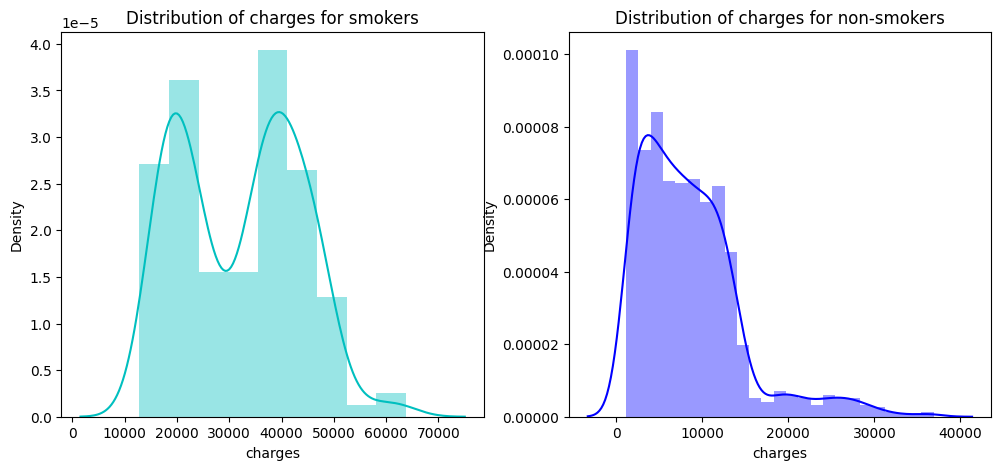

In [24]:
#Check for correlation
fig= plt.figure(figsize=(12,5))
ax=fig.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=fig.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')


<AxesSubplot: >

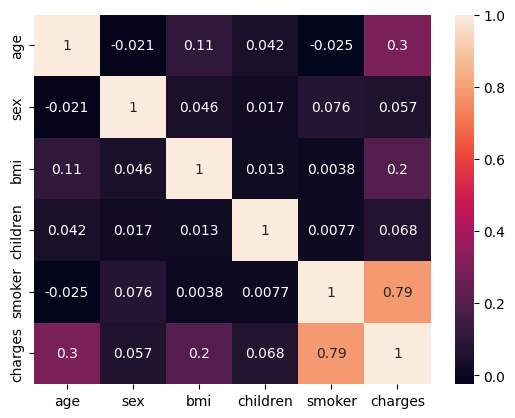

In [13]:
sns.heatmap(df.corr(),annot = True)

In [26]:
x = df.drop('charges',axis=1)
y = df['charges']

In [27]:
x.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [28]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, train_size = .8, random_state=100, shuffle = True, stratify = None)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)*100

79.46968492150816

ValueError: x and y must be the same size

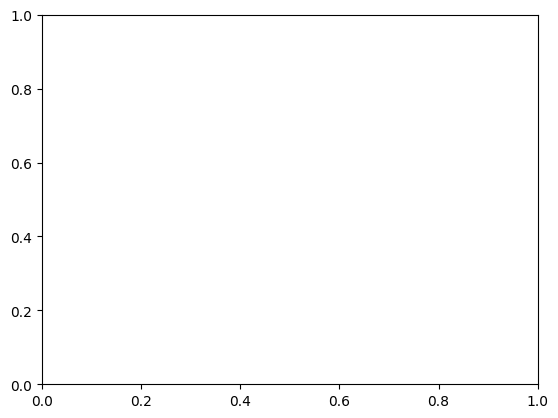

In [42]:
# plt.scatter(X_train, y_train, colour = 'blue')
# # plt.plot(X_test, y_pred, colour = 'red')
# # plt.xlabel ('Age')
# # plt.ylabel ('Charges')
# # plt.title ('Charges vs Age Scatterplot')